In [1]:
import pandas as pd

In [2]:
s = pd.Series([1,2,3,4,5])

In [3]:
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
s.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [8]:
s = pd.Series(["A","B","B","A","A"])

In [9]:
s

0    A
1    B
2    B
3    A
4    A
dtype: object

In [10]:
s.describe()

count     5
unique    2
top       A
freq      3
dtype: object

In [11]:
s.value_counts()

A    3
B    2
dtype: int64

In [13]:
s.values

array(['A', 'B', 'B', 'A', 'A'], dtype=object)

In [14]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
s.value_counts()["A"]

3

In [16]:
s.value_counts().index

Index(['A', 'B'], dtype='object')

In [18]:
v = pd.Series([3,2,1], index=["A","B","C"])

In [19]:
v

A    3
B    2
C    1
dtype: int64

In [20]:
v["A"]

3

In [21]:
v["A"] = v["B"]*5

In [22]:
v

A    10
B     2
C     1
dtype: int64

In [23]:
v[["A","C"]]

A    10
C     1
dtype: int64

In [24]:
v[v>=2]

A    10
B     2
dtype: int64

In [25]:
"A" in v

True

In [26]:
d = pd.Series({"a": 1, "b": 2, "c": 3})

In [27]:
d

a    1
b    2
c    3
dtype: int64

In [29]:
import numpy as np
d["c"] = np.nan

In [30]:
d

a    1.0
b    2.0
c    NaN
dtype: float64

In [31]:
pd.isnull(d)

a    False
b    False
c     True
dtype: bool

In [32]:
pd.isnull(d).all()

False

In [33]:
pd.isnull(d).any()

True

In [41]:
ss = pd.Series({"a": 1, "b": 2, "c":3, "d": 4})[["d","c","b","a"]]

In [42]:
ss

d    4
c    3
b    2
a    1
dtype: int64

In [43]:
d+ss #suma matcheando indices

a    2.0
b    4.0
c    NaN
d    NaN
dtype: float64

In [46]:
set(ss.index).intersection(d.index)

{'a', 'b', 'c'}

In [47]:
set(ss.index).difference(d.index)

{'d'}

In [48]:
d.fillna(0)

a    1.0
b    2.0
c    0.0
dtype: float64

In [49]:
d.dropna()

a    1.0
b    2.0
dtype: float64

In [50]:
d.fillna(d.mean())

a    1.0
b    2.0
c    1.5
dtype: float64

In [51]:
d.name = 'nhijos'

In [52]:
d

a    1.0
b    2.0
c    NaN
Name: nhijos, dtype: float64

In [53]:
data = {"clientes": [3, 8, 2], "tienda": ['a', 'b', 'c'], "facturacion": [100, 200, 300]}

In [54]:
df = pd.DataFrame(data)
df

,clientes,tienda,facturacion
0,3,a,100
1,8,b,200
2,2,c,300


In [55]:
df.values

array([[3, 'a', 100],
       [8, 'b', 200],
       [2, 'c', 300]], dtype=object)

In [56]:
df.columns

Index(['clientes', 'tienda', 'facturacion'], dtype='object')

In [57]:
df['facturacion']

0    100
1    200
2    300
Name: facturacion, dtype: int64

In [58]:
df[['facturacion']]

,facturacion
0,100
1,200
2,300


In [59]:
df[['facturacion','tienda']]

,facturacion,tienda
0,100,a
1,200,b
2,300,c


In [61]:
df.index.name = "dia"

In [62]:
df.head(1)

,clientes,tienda,facturacion
dia,,,
0,3,a,100


In [63]:
df.tail(1)

,clientes,tienda,facturacion
dia,,,
2,2,c,300


In [64]:
df.sample(2) # coge registros aleatorios

,clientes,tienda,facturacion
dia,,,
1,8,b,200
2,2,c,300


In [65]:
'clientes' in df

True

In [67]:
df['pasta cliente'] = df['facturacion'] / df['clientes']

In [68]:
df

,clientes,tienda,facturacion,pasta cliente
dia,,,,
0,3,a,100,33.333333
1,8,b,200,25.000000
2,2,c,300,150.000000


In [69]:
df["visitas"] = np.array([100,200,50])

In [70]:
df

,clientes,tienda,facturacion,pasta cliente,visitas
dia,,,,,
0,3,a,100,33.333333,100
1,8,b,200,25.000000,200
2,2,c,300,150.000000,50


In [71]:
df['visitas'] / df['clientes']

dia
0    33.333333
1    25.000000
2    25.000000
dtype: float64

In [72]:
df['super visitas'] = df['visitas'] > 70

In [73]:
df

,clientes,tienda,facturacion,pasta cliente,visitas,super visitas
dia,,,,,,
0,3,a,100,33.333333,100,True
1,8,b,200,25.000000,200,True
2,2,c,300,150.000000,50,False


In [75]:
df2 = df.set_index('tienda')

In [76]:
df2

,clientes,facturacion,pasta cliente,visitas,super visitas
tienda,,,,,
a,3,100,33.333333,100,True
b,8,200,25.000000,200,True
c,2,300,150.000000,50,False


In [78]:
df2['facturacion']['b']

200

In [80]:
df2.reset_index().set_index("clientes")

,tienda,facturacion,pasta cliente,visitas,super visitas
clientes,,,,,
3,a,100,33.333333,100,True
8,b,200,25.000000,200,True
2,c,300,150.000000,50,False


In [82]:
df2.reindex(['c', 'a', 'b'])

,clientes,facturacion,pasta cliente,visitas,super visitas
tienda,,,,,
c,2,300,150.000000,50,False
a,3,100,33.333333,100,True
b,8,200,25.000000,200,True


In [83]:
df.set_index('super visitas')

,clientes,tienda,facturacion,pasta cliente,visitas
super visitas,,,,,
True,3,a,100,33.333333,100
True,8,b,200,25.000000,200
False,2,c,300,150.000000,50


In [86]:
df.set_index("super visitas").loc[True]

,clientes,tienda,facturacion,pasta cliente,visitas
super visitas,,,,,
True,3,a,100,33.333333,100
True,8,b,200,25.000000,200


In [87]:
df2.loc['a']

clientes               3
facturacion          100
pasta cliente    33.3333
visitas              100
super visitas       True
Name: a, dtype: object

In [88]:
df2.iloc[2]

clientes             2
facturacion        300
pasta cliente      150
visitas             50
super visitas    False
Name: c, dtype: object

In [89]:
df2.drop('b')

,clientes,facturacion,pasta cliente,visitas,super visitas
tienda,,,,,
a,3,100,33.333333,100,True
c,2,300,150.000000,50,False


In [91]:
df2.drop('visitas', axis=1)

,clientes,facturacion,pasta cliente,super visitas
tienda,,,,
a,3,100,33.333333,True
b,8,200,25.000000,True
c,2,300,150.000000,False


In [92]:
df2.drop('visitas', axis='columns')

,clientes,facturacion,pasta cliente,super visitas
tienda,,,,
a,3,100,33.333333,True
b,8,200,25.000000,True
c,2,300,150.000000,False


In [93]:
df2.drop(['clientes', 'visitas'], axis='columns')

,facturacion,pasta cliente,super visitas
tienda,,,
a,100,33.333333,True
b,200,25.000000,True
c,300,150.000000,False


In [94]:
df2.drop([x for x in df.columns if x.endswith('s')], axis=1)

,facturacion,pasta cliente
tienda,,
a,100,33.333333
b,200,25.000000
c,300,150.000000


In [95]:
df2['pasta cliente'] > 50

tienda
a    False
b    False
c     True
Name: pasta cliente, dtype: bool

In [96]:
df2[df2['pasta cliente'] > 50]

,clientes,facturacion,pasta cliente,visitas,super visitas
tienda,,,,,
c,2,300,150.0,50,False


In [99]:
df2[(df2['clientes'] > 2) & (df2['visitas'] < 150)]

,clientes,facturacion,pasta cliente,visitas,super visitas
tienda,,,,,
a,3,100,33.333333,100,True


In [102]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4), columns=['a','b','c','d'])

In [103]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [105]:
df1.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [106]:
df2 = pd.DataFrame(np.arange(20.).reshape(4,5), columns=['a','b','c','d','e'])

In [107]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [108]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,6.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [109]:
comunes = list(set(df1.columns).intersection(set(df2.columns)))

In [110]:
df1[comunes] + df2[comunes]

,c,a,d,b
0,4.0,0.0,6.0,2.0
1,13.0,9.0,15.0,NaN
2,22.0,18.0,24.0,20.0
3,NaN,NaN,NaN,NaN


In [111]:
df1.reindex(columns=df2.columns, fill_value=-1)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,-1
1,4.0,NaN,6.0,7.0,-1
2,8.0,9.0,10.0,11.0,-1


In [112]:
df1.apply(np.sum)

a    12.0
b    10.0
c    18.0
d    21.0
dtype: float64

In [113]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [114]:
df1.apply(lambda x: x ** 2)

,a,b,c,d
0,0.0,1.0,4.0,9.0
1,16.0,NaN,36.0,49.0
2,64.0,81.0,100.0,121.0


In [117]:
def f(x):
    print('x: ',x)
    return x ** 2

In [118]:
df1.apply(f)

x:  0    0.0
1    4.0
2    8.0
Name: a, dtype: float64
x:  0    0.0
1    4.0
2    8.0
Name: a, dtype: float64
x:  0    1.0
1    NaN
2    9.0
Name: b, dtype: float64
x:  0     2.0
1     6.0
2    10.0
Name: c, dtype: float64
x:  0     3.0
1     7.0
2    11.0
Name: d, dtype: float64


,a,b,c,d
0,0.0,1.0,4.0,9.0
1,16.0,NaN,36.0,49.0
2,64.0,81.0,100.0,121.0


In [125]:
def g(x):
    if pd.isnull(x).any():
        return np.nan
    else:
        return np.sum(x)

In [126]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [127]:
df1.apply(g)

a    12.0
b     NaN
c    18.0
d    21.0
dtype: float64

In [128]:
df1.apply(g, axis=1)

0     6.0
1     NaN
2    38.0
dtype: float64

In [130]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [131]:
df1['a']

0    0.0
1    4.0
2    8.0
Name: a, dtype: float64

In [136]:
max(df1['a'])

8.0

In [176]:
def h(x):
    return pd.Series([x.max(),x.min()], index=['Max','Min'])

In [177]:
df1.apply(h)

,a,b,c,d
Max,8.0,9.0,10.0,11.0
Min,0.0,1.0,2.0,3.0


In [178]:
def f(x):
    print(x)
    return(x)

In [179]:
df1.applymap(f) # elemento por elemento

0.0
4.0
8.0
0.0
4.0
8.0
1.0
nan
9.0
2.0
6.0
10.0
3.0
7.0
11.0


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,NaN,6.0,7.0
2,8.0,9.0,10.0,11.0


In [180]:
from sklearn import datasets

ModuleNotFoundError: No module named 'sklearn'

In [181]:
! conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.11
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/dsc/anaconda3/envs/kschool

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py37h4989274_0         5.7 MB

The following NEW packages will be INSTALLED:

    scikit-learn: 0.20.1-py37h4989274_0

Proceed ([y]/n)? ^C


In [ ]:
! quit

In [183]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [184]:
from sklearn import datasets

In [185]:
x, y = datasets.make_circles(factor=.3, noise=.08)

In [193]:
df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]), columns=['x0', 'x1', 'y'])
df.head(3)

,x0,x1,y
0,0.324723,0.090808,1.0
1,-0.143554,-0.263790,1.0
2,0.140474,0.389472,1.0


In [201]:
def euc(x):
    x0 = x.loc['x0']
    x1 = x.loc['x1']
    return np.sqrt(x0 ** 2 + x1 ** 2)

In [204]:
df['Euclidean_dist'] = df.apply(euc, axis=1)
df.head(3)

,x0,x1,y,Euclidean_dist
0,0.324723,0.090808,1.0,0.337181
1,-0.143554,-0.263790,1.0,0.300321
2,0.140474,0.389472,1.0,0.414031


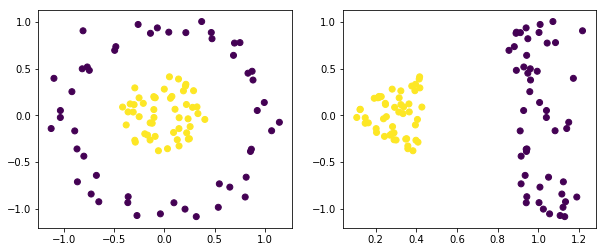

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(x[:,0], x[:,1], c=y)
ax[1].scatter(df['Euclidean_dist'], df['x1'], c=df['y'])
plt.show()

In [208]:
s = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
s

d    0
a    1
b    2
c    3
dtype: int64

In [207]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [209]:
s.sort_values()

d    0
a    1
b    2
c    3
dtype: int64

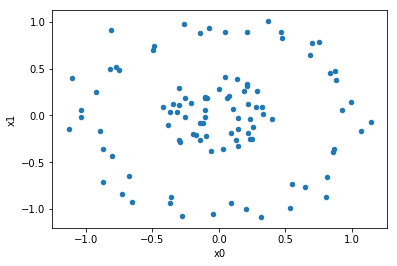

In [210]:
df.plot('x0', 'x1', kind='scatter')

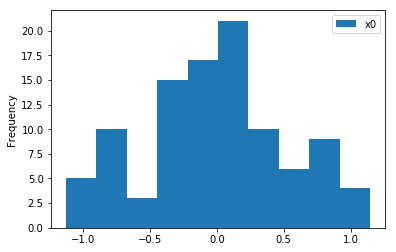

In [213]:
df[['x0']].plot(kind='hist')

In [214]:
s = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [215]:
s.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [216]:
s.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [217]:
s.rank(method='min')

0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

In [218]:
df = pd.DataFrame(data)
df

,clientes,tienda,facturacion
0,3,a,100
1,8,b,200
2,2,c,300


In [219]:
df.describe()

,clientes,facturacion
count,3.000000,3.0
mean,4.333333,200.0
std,3.214550,100.0
min,2.000000,100.0
25%,2.500000,150.0
50%,3.000000,200.0
75%,5.500000,250.0
max,8.000000,300.0


In [223]:
pd.read_csv('cosas.csv', sep=',', header=0)

,plato,cantidad,precio
0,croquetas,12,1
1,tortilla,1,4
2,calamares,1,2
3,nachos,4,3


In [222]:
pd.read_csv('cosas.csv', sep=',', header=0, index_col='plato')

,cantidad,precio
plato,,
croquetas,12,1
tortilla,1,4
calamares,1,2
nachos,4,3


In [224]:
df.to_csv('mas_cosas.psv', sep='|')